### Importing Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

### Profit Customers

##### Importing Pre-Processed Data

In [2]:
profit_cust = pd.read_csv('profit_customers_rfm.csv')
profit_cust.set_index("CustomerID",inplace=True)
profit_cust.head()

# Data Indexed on Customer Level
# Recency = Number of Days Since Most Recent Transaction (assuming today's date as Dec 31st 2018)
# Frequency = Number of Unique Transactions (An Invoice having 20 types of products is taken as 20 transactions)
# Profit = Cumulative Gross Profit Gained from each Customer (Cumulative Extended Price - Cumulative Extended Cost)
# R_Log = Natural Logarithm of Recency    # R_Norm = R_Log normalized to 1-10 scale (R_Norm is high for recent customers)
# F_Log = Natural Logarithm of Frequency  # F_Norm = F_Log normalized to 1-10 scale (F_Norm is high for frequent customers)
# P_Log = Natural Logarithm of Monetary   # P_Norm = P_Log normalized to 1-10 scale (P_Norm is high for high profit customers)
# Score = 0.7*R_Norm + 0.2*F_Norm + 0.1*P_Norm (weights taken from a paper that performed AHP on Hardware Retailer Transactions)

# profit_cust['Score'] = wR*profit_cust['R_Norm'] + wF*profit_cust['F_Norm'] + wP*profit_cust['P_Norm']

,Recency,Frequency,Profit,R_Log,F_Log,P_Log,R_Norm,F_Norm,P_Norm,Score
CustomerID,,,,,,,,,,
12347,25,222,1086.7862,3.2189,5.4027,6.9910,6.8559,6.3734,6.8918,6.7630
12348,16,43,93.2186,2.7726,3.7612,4.5349,7.6216,4.7408,5.6667,6.8499
12349,405,69,141.5815,6.0039,4.2341,4.9529,2.0776,5.2111,5.8752,3.0841
12352,104,72,269.3138,4.6444,4.2767,5.5959,4.4101,5.2535,6.1959,4.7574
12353,86,8,77.0479,4.4543,2.0794,4.3444,4.7362,3.0682,5.5717,4.4861


##### Raw RFM Values

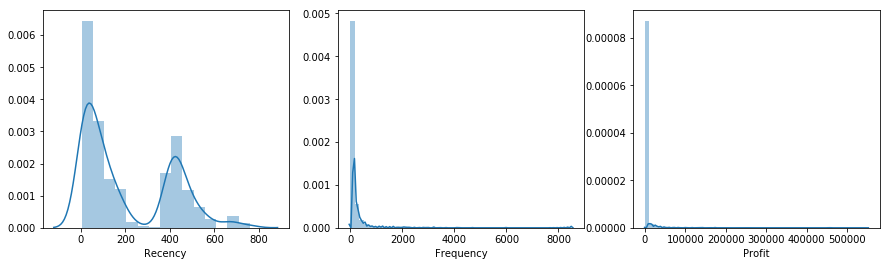

In [3]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
sns.distplot(profit_cust.Recency,ax=axes[0])
sns.distplot(profit_cust.Frequency,ax=axes[1])
sns.distplot(profit_cust.Profit,ax=axes[2])
plt.show()

##### Normalized RFM Values

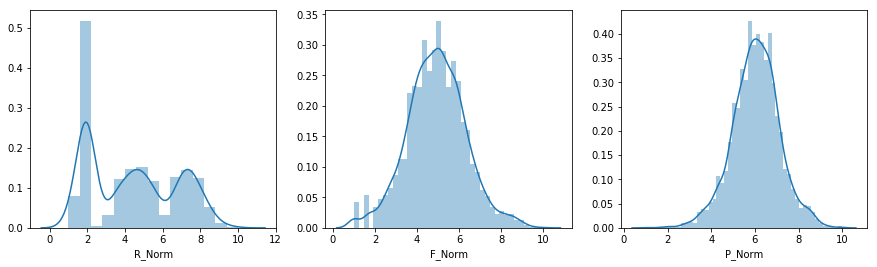

In [4]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
sns.distplot(profit_cust.R_Norm,ax=axes[0])
sns.distplot(profit_cust.F_Norm,ax=axes[1])
sns.distplot(profit_cust.P_Norm,ax=axes[2])
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.46059321019181027
For n_clusters = 4 The average silhouette_score is : 0.4202708571914595
For n_clusters = 5 The average silhouette_score is : 0.3517309141078192


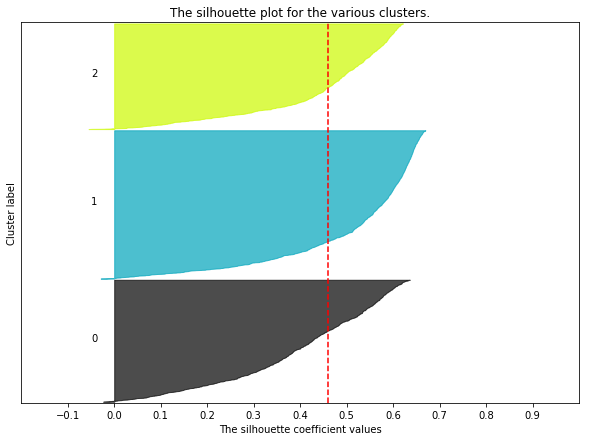

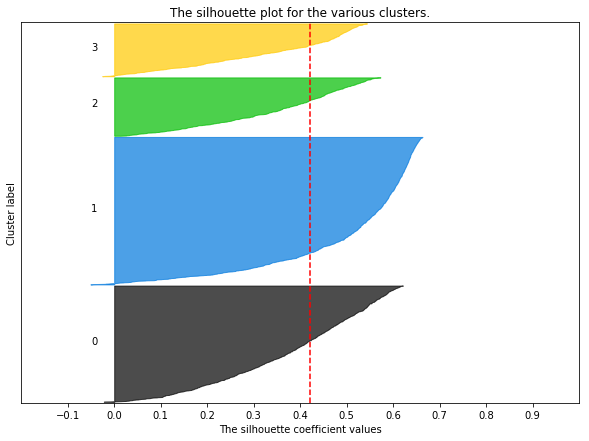

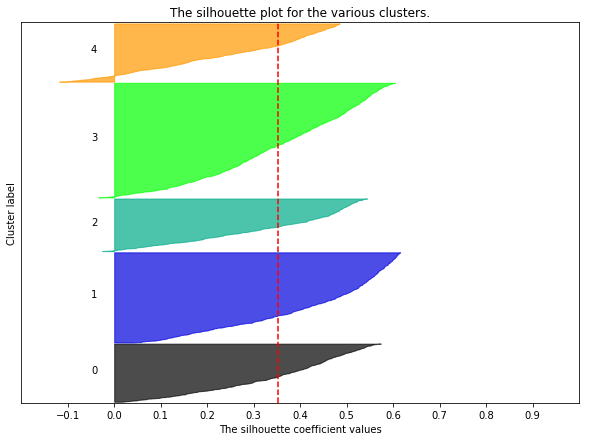

In [5]:
warnings.filterwarnings('ignore')
np.random.seed(3112020)

X1 = profit_cust.iloc[:,-4:]
range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,7)
    ax.set_xlim([-0.2,1])
    ax.set_ylim([0,len(X1)+(n_clusters+1)*10])
    clusterer = KMeans(n_clusters=n_clusters,random_state=3112020)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X1,cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i)/n_clusters)
        ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax.text(-0.05,y_lower+(0.5*size_cluster_i),str(i))
        y_lower = y_upper+10

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1,1,0.1))

plt.show()

For n_clusters = 3 The average silhouette_score is : 0.46059321019181027
For n_clusters = 4 The average silhouette_score is : 0.4202708571914595
For n_clusters = 5 The average silhouette_score is : 0.3517309141078192


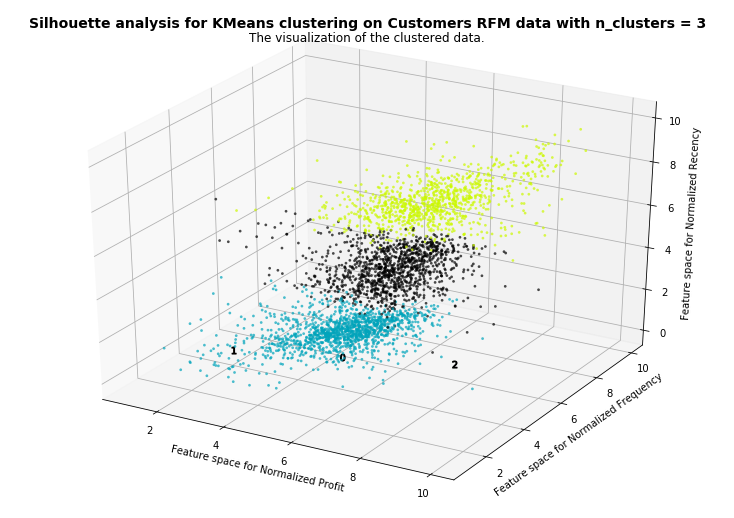

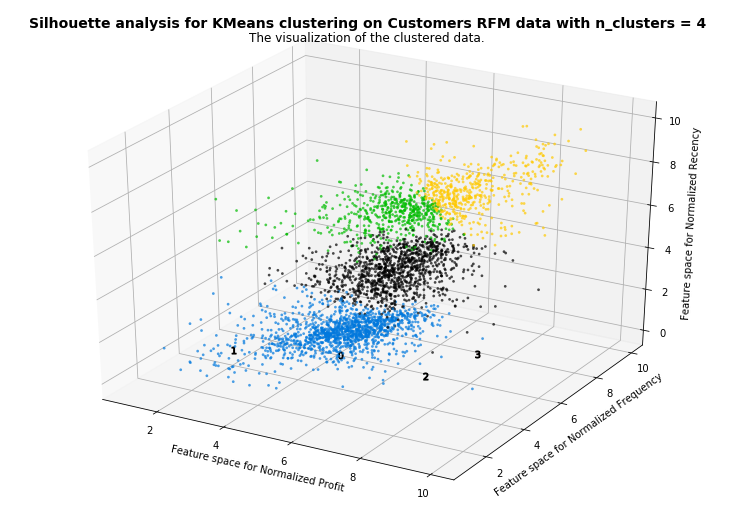

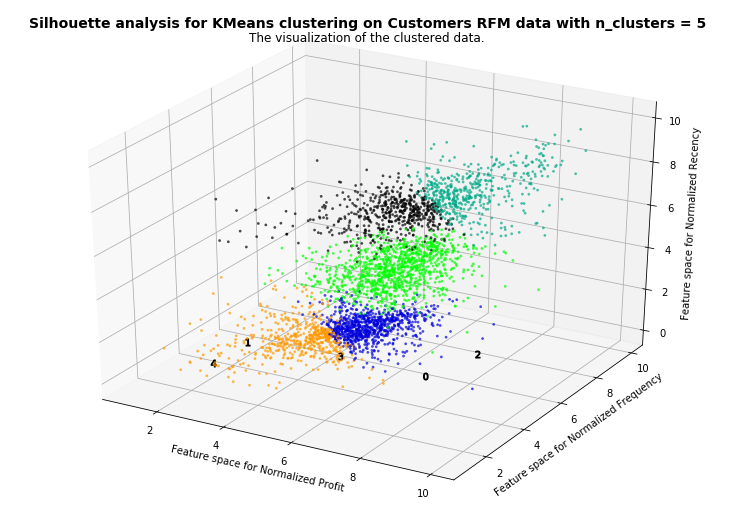

In [6]:
for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    ax = Axes3D(fig)

    fig.set_size_inches(10,7)
    clusterer = KMeans(n_clusters=n_clusters,random_state=3112020)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X1,cluster_labels)

    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax.scatter(X1.iloc[:,2:3],X1.iloc[:,1:2],X1.iloc[:,0:1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')
    centers = clusterer.cluster_centers_

    for i,c in enumerate(centers): ax.scatter(c[0],c[1],marker='$%d$' % i,alpha=1,s=50, edgecolor='k')
    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for Normalized Profit")
    ax.set_ylabel("Feature space for Normalized Frequency")
    ax.set_zlabel('Feature space for Normalized Recency')
    plt.suptitle(("Silhouette analysis for KMeans clustering on Customers RFM data "
                  "with n_clusters = %d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [7]:
profit_cust['Cluster'] = KMeans(n_clusters=3,random_state=3112020).fit_predict(X1)
df1 = profit_cust[['Recency','Frequency','Profit','Cluster','Score']].groupby(['Cluster']).agg(['mean'])
df2 = pd.DataFrame(profit_cust['Cluster'].value_counts()).rename(columns={'Cluster':'Count'})
round(df1.join(df2),2)

,"(Recency, mean)","(Frequency, mean)","(Profit, mean)","(Score, mean)",Count
Cluster,,,,,
0,95.73,91.55,1512.55,4.93,1135
1,436.29,37.08,577.03,2.75,1380
2,19.23,369.76,5351.54,7.12,983


In [8]:
profit_cust.to_excel('profit_clusters.xlsx')

### Loss Customers

##### Importing Pre-Processed Data

In [9]:
loss_cust = pd.read_csv('loss_customers_rfm.csv')
loss_cust.set_index("CustomerID",inplace=True)
loss_cust.head()

# Data Indexed on Customer Level
# Recency = Number of Days Since Most Recent Transaction (assuming today as Dec 31st 2018)
# Frequency = Number of Unique Transactions (An Invoice having 20 types of products is taken as 20 transactions)
# Monetary = Cumulative Gross Loss Faced from each Customer (Cumulative Extended Cost - Cumulative Extended Price)
# R_Log = Natural Logarithm of Recency    # R_Norm = R_Log normalized to 1-10 scale (R_Norm is high for recent customers)
# F_Log = Natural Logarithm of Frequency  # F_Norm = F_Log normalized to 1-10 scale (F_Norm is high for frequent customers)
# L_Log = Natural Logarithm of Loss       # L_Norm = L_Log normalized to 1-10 scale (L_Norm is high for least loss customers)
# Score = 0.7*R_Norm + 0.2*F_Norm + 0.1*L_Norm (weights taken from a paper that performed AHP on Hardware Retailer Transactions)

# AHP (Analytical Hierarchy Process) is a mathematical process used to attribute weights for features; R,F,L in this situation.
# RFL factors weights may vary depending on the industry. AHP involves floating a survey questionnaire to experienced employees
# and managers asking for pair-wise comparisons between R,F,L factors. Final weights are calculated using the survey responses.

,Recency,Frequency,Loss,R_Log,F_Log,L_Log,R_Norm,F_Norm,L_Norm,Score
CustomerID,,,,,,,,,,
12346,236,2,104578.8835,5.4638,0.6931,11.5577,3.0933,1.8212,1.0000,2.6295
12350,152,33,10.4467,5.0239,3.4965,2.3463,3.8816,5.1426,5.9481,4.3405
12356,96,50,82.6498,4.5643,3.9120,4.4146,4.7051,5.6349,4.8371,4.9042
12361,674,10,9.0230,6.5132,2.3026,2.1998,1.2128,3.7280,6.0268,2.1973
12367,391,10,8.3879,5.9687,2.3026,2.1268,2.1886,3.7280,6.0660,2.8842


##### Raw RFM Values

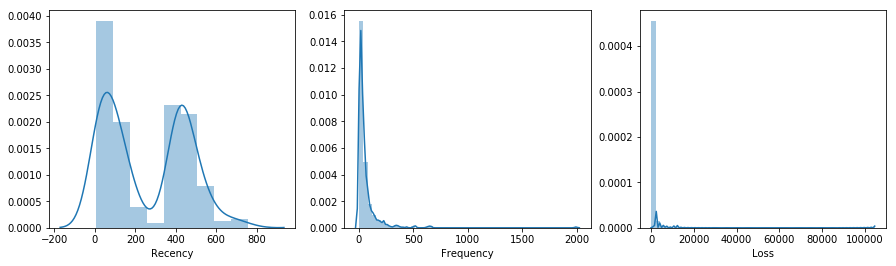

In [10]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
sns.distplot(loss_cust.Recency,ax=axes[0])
sns.distplot(loss_cust.Frequency,ax=axes[1])
sns.distplot(loss_cust.Loss,ax=axes[2])
plt.show()

##### Normalized RFM Values 

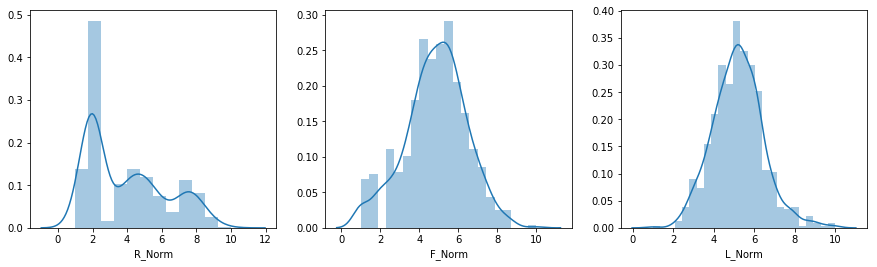

In [11]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
sns.distplot(loss_cust.R_Norm,ax=axes[0])
sns.distplot(loss_cust.F_Norm,ax=axes[1])
sns.distplot(loss_cust.L_Norm,ax=axes[2])
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.41960514120260306
For n_clusters = 4 The average silhouette_score is : 0.3607957422760074
For n_clusters = 5 The average silhouette_score is : 0.3348760195147242


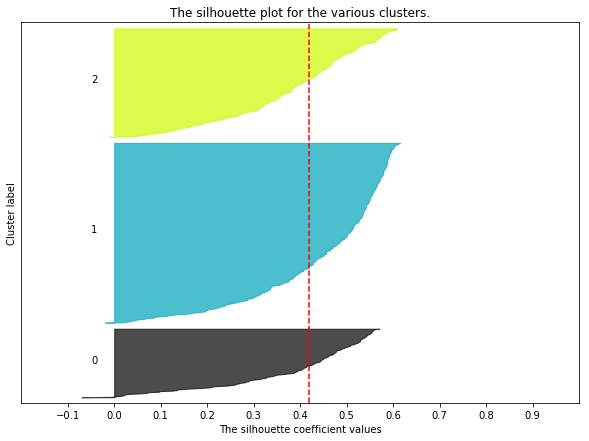

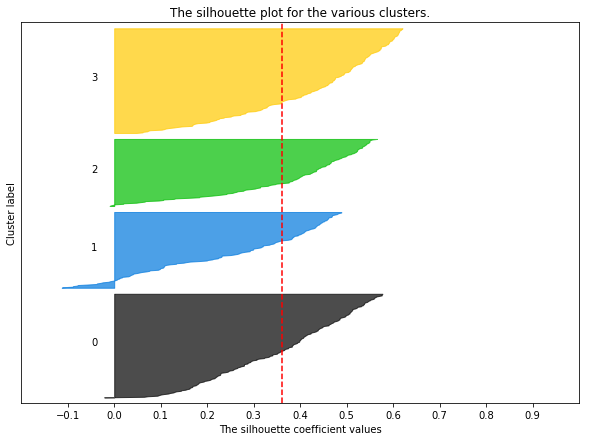

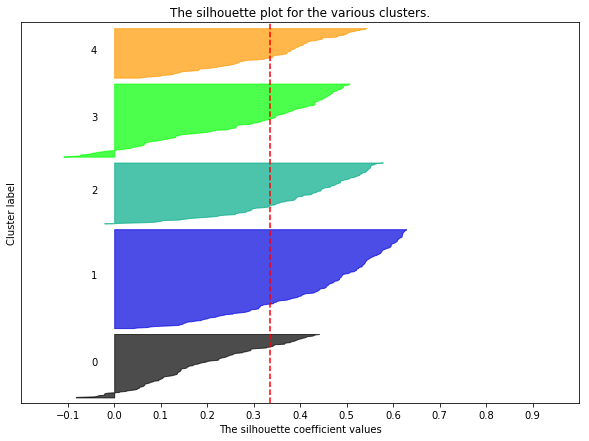

In [12]:
warnings.filterwarnings('ignore')
np.random.seed(3112020)

X2 = loss_cust.iloc[:,-4:]
range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,7)
    ax.set_xlim([-0.2,1])
    ax.set_ylim([0,len(X2)+(n_clusters+1)*10])
    clusterer = KMeans(n_clusters=n_clusters,random_state=3112020)
    cluster_labels = clusterer.fit_predict(X2)
    silhouette_avg = silhouette_score(X2,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X2,cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i)/n_clusters)
        ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax.text(-0.05,y_lower+(0.5*size_cluster_i),str(i))
        y_lower = y_upper+10

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1,1,0.1))

plt.show()

For n_clusters = 3 The average silhouette_score is : 0.41960514120260306
For n_clusters = 4 The average silhouette_score is : 0.3607957422760074
For n_clusters = 5 The average silhouette_score is : 0.3348760195147242


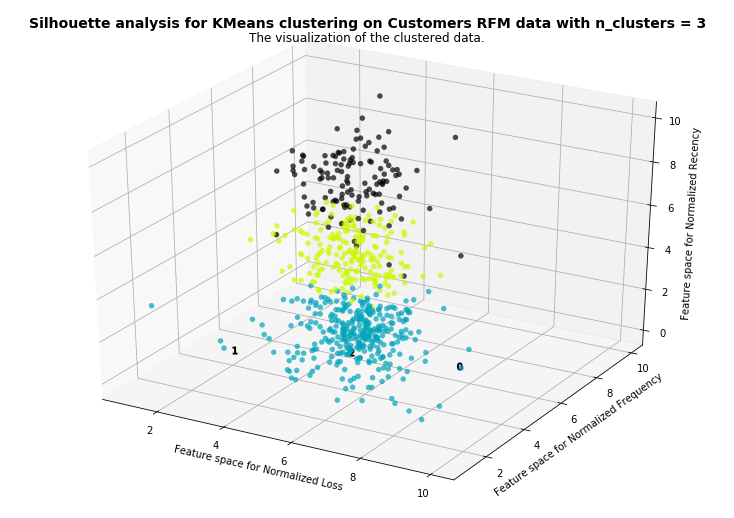

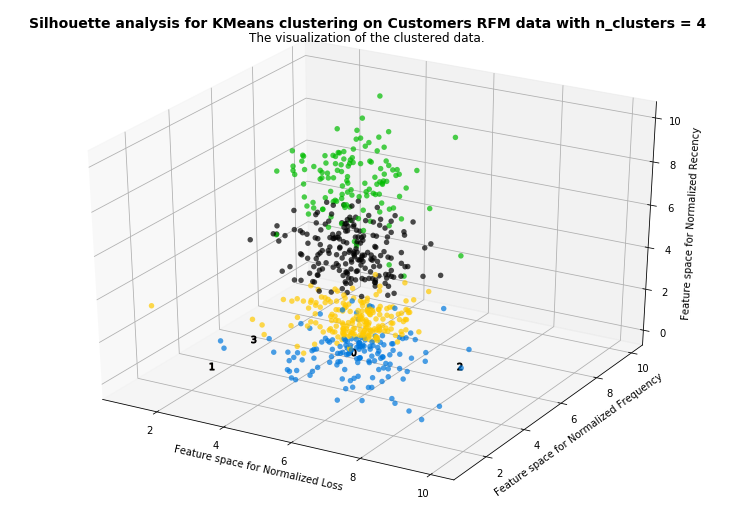

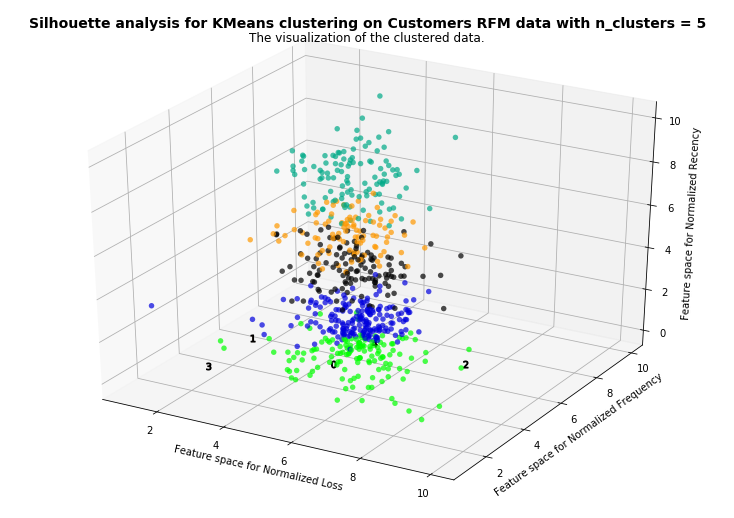

In [13]:
for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    ax = Axes3D(fig)

    fig.set_size_inches(10,7)
    clusterer = KMeans(n_clusters=n_clusters,random_state=3112020)
    cluster_labels = clusterer.fit_predict(X2)
    silhouette_avg = silhouette_score(X2,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X2,cluster_labels)

    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax.scatter(X2.iloc[:,2:3],X2.iloc[:,1:2],X2.iloc[:,0:1],marker='o',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')
    centers = clusterer.cluster_centers_

    for i,c in enumerate(centers): ax.scatter(c[0],c[1],marker='$%d$' % i,alpha=1,s=50, edgecolor='k')
    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for Normalized Loss")
    ax.set_ylabel("Feature space for Normalized Frequency")
    ax.set_zlabel('Feature space for Normalized Recency')
    plt.suptitle(("Silhouette analysis for KMeans clustering on Customers RFM data "
                  "with n_clusters = %d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [14]:
loss_cust['Cluster'] = KMeans(n_clusters=3,random_state=3112020).fit_predict(X2)
df3 = loss_cust[['Recency','Frequency','Loss','Cluster','Score']].groupby(['Cluster']).agg(['mean'])
df4 = pd.DataFrame(loss_cust['Cluster'].value_counts()).rename(columns={'Cluster':'Count'})
round(df3.join(df4),2)

,"(Recency, mean)","(Frequency, mean)","(Loss, mean)","(Score, mean)",Count
Cluster,,,,,
0,19.90,136.10,880.19,7.01,125
1,440.31,23.25,436.80,2.80,326
2,103.08,66.40,400.11,4.89,197


In [15]:
loss_cust.to_excel('loss_clusters.xlsx')